# 지도 학습

## 지도 학습
- 모형(model)
    - 데이터에 나타나는 특성들과 타켓 사이의 관계를 표현하는 수학적 구조
    - 모수(parameter): 데이터를 사용하여 추정(계산)하는 파라미터
    - 초모수(hyperparameter): 추정 모수 이외에 분석자가 지정하거나, 최적값을 찾아 주어야 하는 다른 모든 모수
- 학습: 데이터를 사용하여 모형에 포함된 조정 가능한 모수의 값을 추정하는 과정

## 지도 학습에서의 데이터 분할(partition)
- 학습(훈련)은 일반화를 목적으로 하므로 훈려에 사용되는 데이터와 모형 평가에 사용되는 데이터로 나눠야 함
- 데이터의 분할
    - **훈련 데이터(training data): 모델 구축용 데이터**
        - 훈련 오차를 최소로 하도록 모형의 모수(parameter) 추정
    - 검증 데이터(validation data): 모델 검증용 데이터
        - 모형의 초모수(hyperparameter)를 추정(훈련 데이터를 검증 데이터에 재사용)
    - **테스트 데이터(test data): 평가용 데이터**
        - 훈련 데이터와 독립적으로 따로 떼어놓은(hold-out) 데이터
        - 훈련되고 튜닝된 모형을 적용하여 평가할 대상 데이터
    

## 과대적합 vs 과소적합
- 훈련 데이터 과대 적합(overfitting): 고분산(high-variance) 문제
    - 모형이 데이터의 패턴을 너무 과도하게 반영한 것
    - 훈련 데이터에 대한 성능은 좋지만 샘플에서의 일반화 성능이 나빠짐
- 훈련 데이터 과소 적합(underfitting): 고편향(high-bias) 문제
    - 모형이 너무 단순한 것
- trade-off 관계
    - 저편향과 저분산을 동시에 지향하지만, 이 둘은 상충관계임
    

## 지도학습의 전형적 단계
1. 데이터 읽기(적재)
2. 데이터 전처리 및 준비: 데이터 특성 추출, 데이터 분할 등
3. 훈련용 데이터로 다수의 모델 훈련시키기(모형의 모수 추정)
    - 가능성 있는 몇 개의 모형 선정
4. 검증 데이터를 사용하여 모델 튜닝(하이퍼파라미터 추정)
5. 테스트 데이터로 베스트 모델 평가
6. 모델 디플로이(deploy): 의사결정에 모델 활용

## 사이킷런 API 사용 단계(복습)
- API 사용 단계
    1. 필요한 사이킷런 추정기 클래스를 임포트
    2. 모델 클래스를 인스턴스화(모델의 하이퍼파라미터(초모수 지정)
    3. 데이터를 특징 행렬(X)과 타겟(y)으로 배치
    4. 모델 인스턴스의 fit() 메서드로 모델을 학습(fitting, training, learning)
    5. score() 메서드를 사용하여 모형의 성능(정확도) 평가
    

# 분류

## 분류의 종류
- 이진(binary) 분류 vs 다진(multi-class) 분류
- 이진 분류의 클래스 레이블
    - 긍정 클래스: 상대적으로 더 유의미한 범주(ex. 악성종양, 스팸메일), 보통 1로 표시
    - 부정 클래스: 보통 0 혹은 -1로 표시


## 대표적 분류 알고리즘
- 로지스틱 회귀
- SVM
- 결정트리
- K-최근접 이웃: 게으른 분류기

## 분류의 성능평가 측도
- 이진 분류 정오분류표(confusion matrix)
![그림](https://miro.medium.com/max/625/1*fxiTNIgOyvAombPJx5KGeA.png)

- 정분류율(정확도, accuracy) vs 오분류율(error)
    - accuracy = $\frac{TP + TN}{TP+FN+FP+TN}$
        - +를 +로 맞추고, -를 -로 맞춘 것
    - error = 1 - accuracy
- 정밀도(precision)
    - 결과의 질(quality)를 측정
    - precision = $\frac{TP}{TP+FP}$ = $\frac{실제 양성}{양성이라고 판정나온 사람}$
- 재현율(recall)
    - 결과의 완벽성(completeness) 측도
    - recall = $\frac{TP}{TP+FN}$ = $\frac{실제 양성}{맞춘 값}$
- F-측도(F-measure)
    - 정밀도와 재현율은 서로 trade-off 관계
    - 두 측도를 통합(정밀도와 재현율의 조화평균)
        - F-measure = $2 \frac{precision * recall}{precision + recall}$  

# 붓꽃(Iris) 데이터를 활용한 분류

## 데이터 전처리

### 데이터 로드

- Iris 데이터
    - 4개의 수치형 특성
        - sepal length(cm) : 꽃받침 길이
        - sepal width(cm) : 꽃받침 너비
        - sepal length(cm) : 꽃잎 길이
        - sepal width(cm) : 꽃잎 너비
    - 레이블 : 붓꽃의 종류
        - setosa(0)
        - versicolor(1)
        - virginica(2)

locad_iris 모듈 : scikit-learn Bunch 객체 로드

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.data[:7, :] # numpy.ndarray

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target # 변환된 타겟

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names # 0, 1, 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

> 분석의 편의와 시각화를 위해 꽃잎 길이(2)와 꽃잎 너비(3) 특성만 이용하겠음

In [8]:
X = iris.data.copy()
X = X[:, 2:]
X.shape

(150, 2)

In [24]:
y = iris.target.copy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 데이터 분할

In [29]:
X.shape, y.shape

((150, 2), (150,))

In [30]:
from sklearn.model_selection import train_test_split # 데이터 분할 모듈

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,  # train : test = 7 : 3
                                                    stratify = y)  # y의 분포대로 샘플링(계층화)

X_train.shape, y_train.shape

((105, 2), (105,))

### 훈련 데이터 시각화

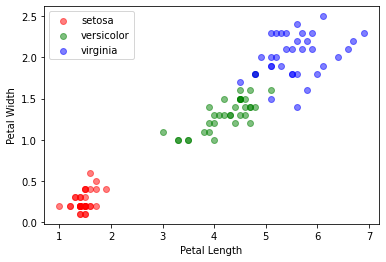

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c = 'r', alpha = 0.5, label = 'setosa')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c = 'g', alpha = 0.5, label = 'versicolor')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], c = 'b', alpha = 0.5, label = 'virginia')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend();

--> 두 개의 특성만 사용했는데도, 눈으로 보기에 분류 가능해보임(= 연구 마저 진행)

### 특성 스케일 조정
- 대부분의 머신러닝 알고리즘의 특성의 스케일을 조정할 때 최상의 성능을 보임
    - raw 데이터는 특성마다 최소값, 최대값이 다름
- sklearn.preprocessing.StandardScaler : 표준정규분포로 표준화
- 훈련데이터 스케일과 동일한 공식으로 테스트 데이터도 변환해주어야 함

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # 인스턴스와
sc.fit(X_train)  # 각 특성별로 평균, 표준편차 계싼
X_train_std = sc.transform(X_train)  # transform() : 구해놨던 평균, 표준편차 구하는 ㅠ공식으로 표준화시킴
X_test_std = sc.transform(X_test) # 같은 공식으로 test 데이터도 스케일 조정

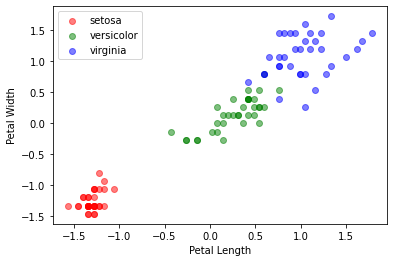

In [49]:
# 스케일 조정 후 시각화
import matplotlib.pyplot as plt

plt.scatter(X_train_std[y_train == 0][:, 0], X_train_std[y_train == 0][:, 1], c = 'r', alpha = 0.5, label = 'setosa')
plt.scatter(X_train_std[y_train == 1][:, 0], X_train_std[y_train == 1][:, 1], c = 'g', alpha = 0.5, label = 'versicolor')
plt.scatter(X_train_std[y_train == 2][:, 0], X_train_std[y_train == 2][:, 1], c = 'b', alpha = 0.5, label = 'virginia')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend();

## 로지스틱 회귀(Logistic regression)를 사용한 분류

### 로지스틱 회귀 모형(Logistic regression)
- 회귀라는 이름이지만 범주형 레이블 예측하는 분류 학습 알고리즘
- 1:N, 종속(명목)
- 이진 분류
    - 주어진 x들에 대하여 긍정(positive) 클래스에 속할 확률 = $p = P[y=1]$
    - 로지스틱 회귀 모형
        - logit(p) = $ln[\frac{p}{1 - p}] = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_1p_p$
            - 이때, p는 클래스일 확률
    - 분류 규칙
    - $\hat p_i > 0.5 (<->$logit$(\hat p_i) > 0)$이면, i번째 객체를 '1'로 분류
    - $\hat p_i $<=$ 0.5 (<->$logit$(\hat p_i) $<=$ 0)$이면, i번째 객체를 '0'으로 분류
- 다진 분류로도 확장 가능

### Scikit-Learn 로지스틱 회귀
- sklearn.linear_model.LogisticRegression
    - 로지스틱 비용함수를 최소화하는 $\beta$들을 계산
        - 경사하강법과 같은 최적화 알고리즘 사용
- 소프트맥스(softmax)함수를 사용하여 다진분류도 가능

In [51]:
from sklearn.linear_model import LogisticRegression

예측

In [57]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)
print(logistic.predict(X_train_std[:10, :])) # ~ 10번째 까지 데이터 예측
print(y_train[:10]) # 정답

[2 2 0 0 2 0 1 0 1 2]
[2 2 0 0 2 0 1 0 1 1]


클래스별 확률 예측(예측 도출 과정)

In [80]:
print(logistic.predict_proba(X_train_std[:1, :]), "  <- [0, 1, 2]의 각 가능성 출력")
print(logistic.predict_proba(X_train_std[:1, :]).argmax(axis = 1), "  <- 그중 가장 높은 값의 인덱스 반환")
print()
print(logistic.predict_proba(X_train_std[1:2, :]), "  <- [0, 1, 2]의 각 가능성 출력")
print(logistic.predict_proba(X_train_std[1:2, :]).argmax(axis = 1), "  <- 그중 가장 높은 값의 인덱스 반환")
print()
print(logistic.predict_proba(X_train_std[2:3, :]), "  <- [0, 1, 2]의 각 가능성 출력")
print(logistic.predict_proba(X_train_std[2:3, :]).argmax(axis = 1), "  <- 그중 가장 높은 값의 인덱스 반환")

[[0.00213344 0.3960029  0.60186366]]   <- [0, 1, 2]의 각 가능성 출력
[2]   <- 그중 가장 높은 값의 인덱스 반환

[[9.81809511e-06 2.64414679e-02 9.73548714e-01]]   <- [0, 1, 2]의 각 가능성 출력
[2]   <- 그중 가장 높은 값의 인덱스 반환

[[9.53835070e-01 4.61615409e-02 3.38928481e-06]]   <- [0, 1, 2]의 각 가능성 출력
[0]   <- 그중 가장 높은 값의 인덱스 반환


로지스틱 회귀 성능평가  
- score() : 모형의 정확도(accurary)를 계산

In [81]:
logistic.score(X_train_std, y_train)

0.9523809523809523

In [82]:
logistic.score(X_test_std, y_test)

0.9555555555555556

테스트데이터에 대한 정오분류표(confusion matrix) 작성

In [83]:
from sklearn.metrics import confusion_matrix
y_pred = logistic.predict(X_test_std)
confusion_matrix(y_test, y_pred) # 실제 값, 예상 값으로 정오분류표 작성

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

--> 정분류율, 정밀도, 재현율

## 서포트 벡터 머신

### SVM(Surpport Vector Machine)
- 매우 강력한 머신러닝 모델
    - 분류와 예측 모두 사용 가능하지만 주로 분류에 많이 사용
    - 선형, 비선형 모형을 사용하여 분류의 성능이 뛰어남
- SVM의 단점과 주의사항
    - 모든 특성 값을 표준화 하여야 성능이 향상
    - 최적 하이퍼파라미터 찾기

### 선형 SVC(Linear Support Vector Classifier)
- 클래스 분류 경계가 선형식
    - $w_0 + w_1x_1 + w_2x_2 + ... + w_px_p = 0$
    - 경계를 중심으로 $w^x = \pm1$
- 최대 마진 분류기
    - 마진(의 폭)이 가장 큰 분류기를 선택
    - 마진: 샘플과 경계선까지의 거리의 최소값
    - 서포트 벡터: 마진에 위치한 관측치(샘플)
    ![그림](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FDlGyf%2FbtqBHyUcpnh%2FNdeKoqKnLe6urHfTxSsJC0%2Fimg.png)

### 소프트 마진 분류
- 데이터가 선형적으로 완전히 구별되는 경우는 극히 드묾(몇 개의 관측치는 오분류되는 것을 허용하면서 일반적인 선형 경계를 구하는 분류)
- 하이퍼파라미터 $C$를 사용하여 모델의 과대적합 정도를 규제
    - $C$값이 작으면 분류 오차에 덜 민감
    - $C$가 클수록 마진 폭이 작아짐(엄격해짐)

In [1]:
# SCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# X, y 데이터 준비
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))
X = X[:, [2,3]]

In [3]:
# 데이터 분할
from sklearn.model_selection import train_test_split # 데이터 분할 모듈

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,  # train : test = 7 : 3
                                                    stratify = y)  # y의 분포대로 샘플링(계층화)
X_train.shape, y_train.shape

((105, 2), (105,))

In [4]:
# X데이터 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # 인스턴스와
sc.fit(X_train)  # 각 특성별로 평균, 표준편차 계산
X_train_std = sc.transform(X_train)  # transform() : 구해놨던 평균, 표준편차 구하는 ㅠ공식으로 표준화시킴
X_test_std = sc.transform(X_test) # 같은 공식으로 test 데이터도 스케일 조정

In [12]:
# fit & score
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear', C = 1.0)
svc_linear.fit(X_train_std, y_train)

print(svc_linear.score(X_train_std, y_train), svc_linear.score(X_test_std, y_test))

0.9714285714285714 0.9555555555555556


### 커널 서포트 벡터 분류기
- 결정(분류) 경계에 비선형인 경우
- 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가
    - 특성이 너무 많아져서 모델이 복잡해질 수 있음(차원의 저주)
- 커널(kernel) 기법
    - 실제로 데이터를 확장하지 않고 확장된 특성에 대한 내적을 이용
    - 커널 함수: 'linear', 'poly', 'rbf', 'sigmoid'
    - 대표적 커널: 가우시안 rbf 커널
        - 가우시안 -> 정규분포

In [16]:
svc_rbf = SVC(kernel = 'rbf', random_state = 1)
svc_rbf.fit(X_train_std, y_train)
svc_rbf.score(X_train_std, y_train), svc_rbf.score(X_test_std, y_test)

(0.9714285714285714, 0.9555555555555556)

### SVM에서의 초모수
- $C$ = penalty parameter(C값이 작을수록 마진의 폭이 넓아짐
- gamma = 가우시안 커널 폭의 역수 $\gamma = 1/2\sigma^2$
- SVM 모델에서는 gamma와 C를 동시에 조절해야 함

### XOR 데이터셋
- XOR: 하나만 참일 때 참
- 비선형 경계를 갖는 대표적 예제

In [21]:
# 데이터 생성
np.random.seed(1)
X_xor = np.random.randn(200, 2)  # 정규분포 난수 200*2
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# gamma 0.1 / C 10.0
svc_xor = SVC(kernel = 'rbf', gamma = 0.1, C = 10.0)
svc_xor.fit(X_xor, y_xor)
print(svc_xor.score(X_xor, y_xor))

# gamma 10 / C 1
svc_xor = SVC(kernel = 'rbf', gamma = 10, C = 1)
svc_xor.fit(X_xor, y_xor)
print(svc_xor.score(X_xor, y_xor))  # overfitted

0.91
0.98
